In [178]:
import pandas as pd
import matplotlib.pyplot as plt


r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
data = pd.read_csv("/Users/sivanr/PycharmProjects/eCommerce/ml-100k/u1.base", delimiter='\t', names=r_cols)
r_data = data.groupby('movie_id')['rating'].mean()
round_r_data = r_data.astype(int)
round_r_data

movie_id
1       3
2       3
3       3
4       3
5       3
6       3
7       3
8       3
9       3
10      3
11      3
12      4
13      3
14      3
15      3
16      3
17      3
18      2
19      3
20      3
21      2
22      4
23      4
24      3
25      3
26      3
27      3
28      3
29      2
30      4
       ..
1653    5
1654    1
1655    2
1656    3
1657    3
1658    3
1659    1
1660    2
1661    1
1662    2
1663    2
1664    3
1665    2
1666    2
1667    3
1668    3
1669    2
1670    3
1671    1
1672    2
1673    3
1674    4
1675    3
1676    2
1677    3
1678    1
1679    3
1680    2
1681    3
1682    3
Name: rating, Length: 1650, dtype: int64

In [144]:
mean_counts = {}

for k in round_r_data:
    mean_counts[k] = mean_counts.get(k, 0) + 1
mean_counts

{3: 893, 4: 163, 2: 479, 1: 107, 5: 8}

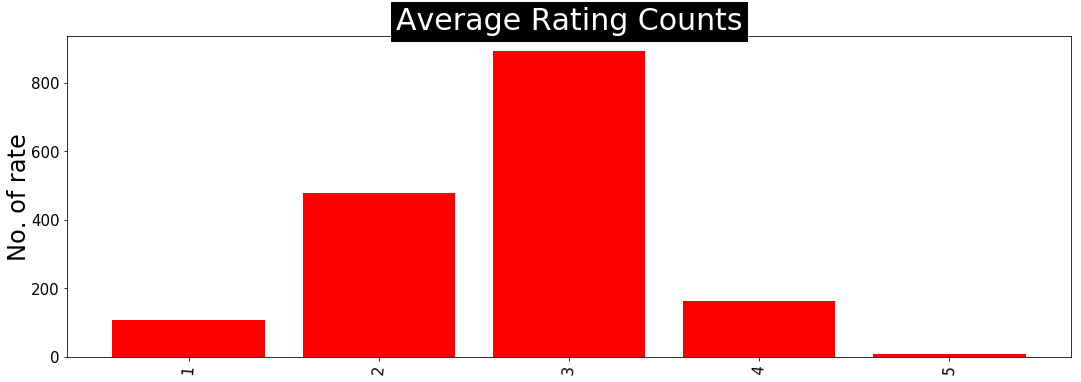

In [145]:
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = list(mean_counts.values())
x_axis = list(mean_counts.keys())
x_label = list(mean_counts.keys())
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of rate", fontsize=24, labelpad=0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Average Rating Counts", bbox={'facecolor': 'k', 'pad': 5}, color='w', fontsize=30)
plt.show()

In [146]:
r_data = r_data.sort_values(ascending=False)
r_data.head(3)  # TODO: get the movie title

movie_id
1500    5.0
1201    5.0
1293    5.0
Name: rating, dtype: float64

In [225]:
u_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
data_u = pd.read_csv('/Users/sivanr/PycharmProjects/eCommerce/ml-100k/u.user', delimiter='|', names=u_cols)
users_ratings = data.merge(data_u, on='user_id', how='inner')

males = users_ratings.loc[users_ratings['gender'] == 'M']
females = users_ratings.loc[users_ratings['gender'] == 'F']

female_rating = females.groupby(['movie_id'])['rating'].mean()
round_female_data = female_rating.astype(int)

male_rating = males.groupby(['movie_id'])['rating'].mean()
round_male_data = male_rating.astype(int)

round_female_data

movie_id
1       3
2       3
3       2
4       3
5       3
6       3
7       3
8       4
9       3
10      3
11      3
12      4
13      3
14      3
15      3
16      3
17      2
18      3
19      4
20      3
21      3
22      4
23      4
24      3
25      3
26      3
27      2
28      4
29      3
30      4
       ..
1638    3
1639    4
1640    3
1641    3
1642    4
1643    3
1644    1
1645    4
1646    3
1647    3
1648    2
1649    3
1650    4
1651    4
1652    1
1656    2
1658    2
1661    1
1662    4
1663    2
1664    2
1665    2
1666    2
1667    3
1668    3
1669    2
1670    3
1671    1
1673    3
1677    3
Name: rating, Length: 1506, dtype: int64

In [210]:
male_rating_counts = {}
for k in round_male_data:
    male_rating_counts[k] = male_rating_counts.get(k, 0) + 1
male_rating_counts

{3: 800, 4: 213, 2: 442, 1: 87, 5: 13}

In [211]:
female_rating_counts = {}

for k in round_female_data:
    female_rating_counts[k] = female_rating_counts.get(k, 0) + 1
female_rating_counts

{3: 815, 2: 361, 4: 190, 1: 126, 5: 14}

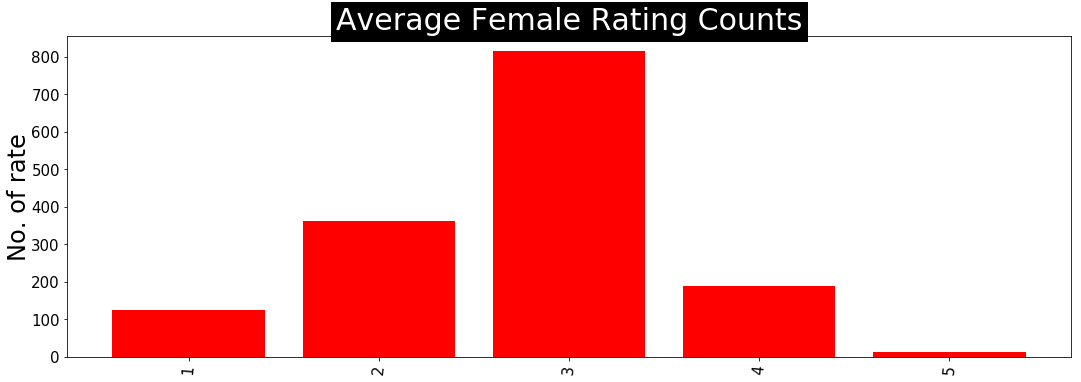

In [212]:
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = list(female_rating_counts.values())
x_axis = list(female_rating_counts.keys())
x_label = list(female_rating_counts.keys())
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of rate", fontsize=24, labelpad=0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Average Female Rating Counts", bbox={'facecolor': 'k', 'pad': 5}, color='w', fontsize=30)
plt.show()

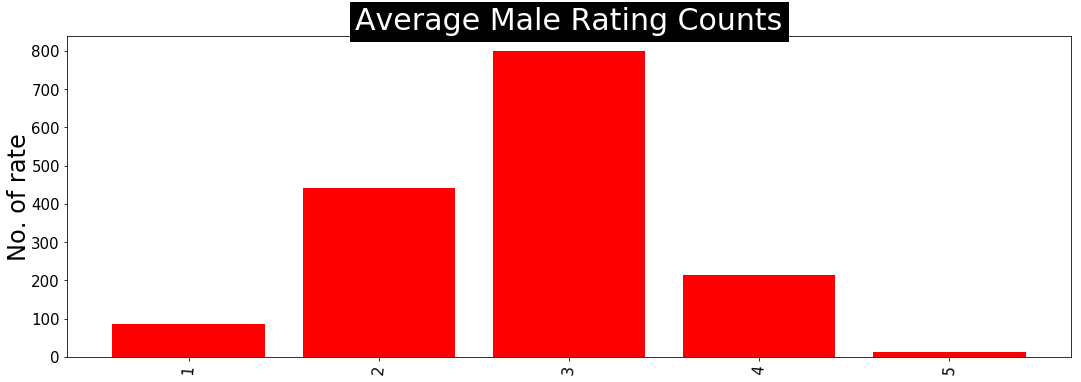

In [213]:
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = list(male_rating_counts.values())
x_axis = list(male_rating_counts.keys())
x_label = list(male_rating_counts.keys())
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of rate", fontsize=24, labelpad=0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Average Male Rating Counts", bbox={'facecolor': 'k', 'pad': 5}, color='w', fontsize=30)
plt.show()

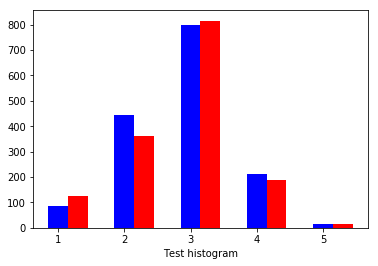

In [214]:
import numpy as np
sorted_keys = sorted(male_rating_counts.keys())
males_values = [male_rating_counts[k] for k in sorted_keys]
females_values = [female_rating_counts[k] for k in sorted_keys]
indices = np.arange(1, len(sorted_keys)+1)
width = 0.3
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(indices,males_values,width,color='b',label='-Ymin')
ax.bar(indices+width,females_values,width,color='r',label='Ymax')
ax.set_xlabel('Test histogram')
plt.show()

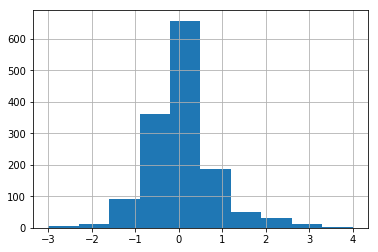

In [231]:
female_rating.sort_values(ascending=False, inplace=True)
male_rating.sort_values(ascending=False, inplace=True)
difference_ratings = male_rating - female_rating

difference_ratings = difference_ratings.dropna()
difference_ratings.hist()


In [ ]:
difference_ratings